# Periodic IC for PFHub BM 1

This notebook explores alternative initial conditions for PFHub BM 1 (Spinodal Decomposition)
that satisfy periodicity and smoothness at the domain boundaries.

The initial condition specified in BM 1a is not periodic at the boundaries:

$$
c_0 = 0.5 + \varepsilon \left\{
                \cos(0.105 \cdot x) \cos(0.110 \cdot y) \\
        + \left[\cos(0.130 \cdot x) \cos(0.087 \cdot y)\right]^2 \\
             +  \cos(0.025 \cdot x  - 0.150 \cdot y)
                \cos(0.070 \cdot x  - 0.020 \cdot y)
    \right\}
$$

Perhaps the easiest approach to periodicity is to multiply the initial condition
by a smooth "tophat" function, yielding zeroes near the boundary and bulk values elsewhere.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from scipy.special import erf, erfc

In [2]:
L = 200.
dx = 0.2
N = np.rint(L / dx).astype(int)
w = 0.05 * L  # boundary width

c0 = 0.5
ϵ = 0.01

x = np.linspace(0, L, N)
X, Y = np.meshgrid(x, x, indexing="xy")

A0 = np.array([0.105, 0.130, 0.025, 0.070])  # np.pi/L * np.array([6.6845076, 8.2760570, 1.5915494, 4.4563384])
B0 = np.array([0.110, 0.087, 0.150, 0.020])  # np.pi/L * np.array([7.0028175, 5.5385920, 9.5492966, 1.2732395])

hat = lambda x: 0.5 * (1 + np.tanh(np.pi * x / w)) * (1 + np.tanh(np.pi * (L - x) / w)) - 1

ic = lambda x, y: np.cos(A0[0] * x) * np.cos(B0[0] * y) \
               + (np.cos(A0[1] * x) * np.cos(B0[1] * y))**2 \
               +  np.cos(A0[2] * x  - B0[2] * y) \
               *  np.cos(A0[3] * x  - B0[3] * y)

pf_ic = lambda x, y: c0 + ϵ * ic(x, y)

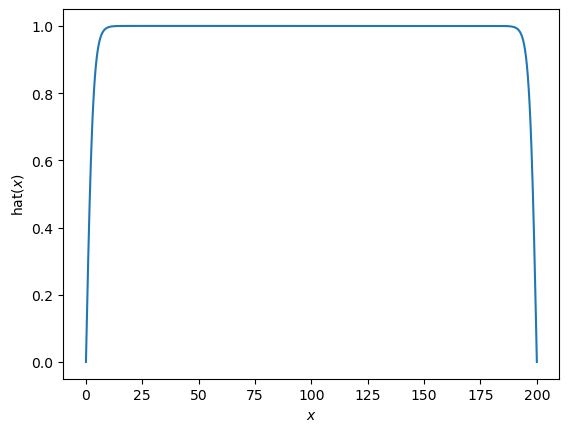

In [3]:
plt.plot(x, hat(x));
plt.xlabel("$x$");
plt.ylabel("$\\operatorname{hat}(x)$");

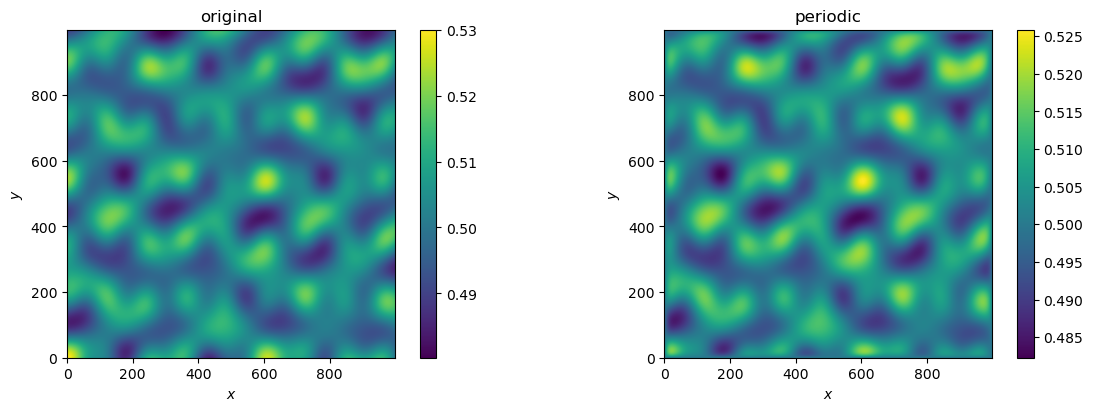

In [4]:
orig_ic = pf_ic(X, Y)
peri_ic = c0 + ϵ * hat(X) * hat(Y) * ic(X, Y)

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=False, constrained_layout=True)

fig.colorbar(axs[0].imshow(orig_ic, interpolation=None, origin="lower"));
axs[0].set_title("original");
axs[0].set_xlabel("$x$");
axs[0].set_ylabel("$y$");

fig.colorbar(axs[1].imshow(peri_ic, interpolation=None, origin="lower"));
axs[1].set_title("periodic");
axs[1].set_xlabel("$x$");
axs[1].set_ylabel("$y$");

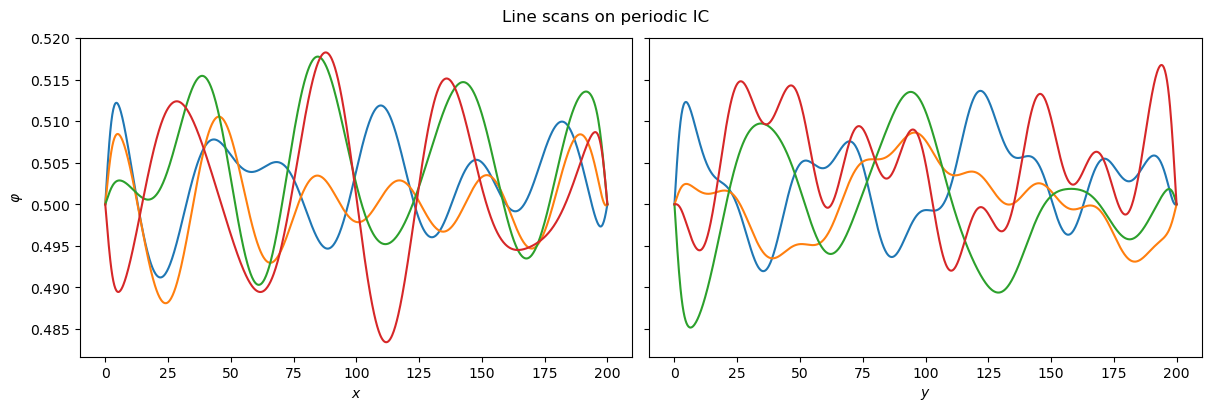

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=True, constrained_layout=True)

fig.suptitle("Line scans on periodic IC")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$\\varphi$")

axs[1].set_xlabel("$y$")

for z in np.arange(10, L, 50, dtype=int):
    axs[0].plot(x, peri_ic[:, z]);
    axs[1].plot(x, peri_ic[z, :]);